In [111]:
# https://datagraphi.com/blog/post/2019/9/23/feature-selection-with-sklearn-in-python
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#example-4-plotting-the-results

## Feature selection

Para demonstrar os métodos de seleção de características em Python usaremos o dataset da diabetes.

### Use conjunto de dados (dataset) de diabetes

In [1]:
import pandas as pd

In [2]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [7]:
df_diabetes = pd.read_csv('diabetes.csv', names = names)

In [8]:
df_diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Guarde os dados em dois dataframes, X e Y.
Selecione X como o conjunto de característica, e Y como a variável de resposta. Aqui, a variável de resposta Y é uma classe.

* X é o conjunto das variáveis de treino.
* Y é a resposta, neste caso uma das duas classes (0 normal, 1 diabético)

In [11]:
X = df_diabetes[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']]

In [12]:
Y = df_diabetes['class']

## Remoção de características com baixa variância

O primeiro método de remoção de característiscas que podemos usar é remover as características de baixa variancia.
A ideia por trás disso é de que as características de baixa variancia, ex. características que geralmente permanecem as mesmas em diferentes observações, não devem ser idealmente responsáveis por oferecer respostas para as observações.

### Procedimento:
* Nos vamos criar um objeto VarianceThreshold no Sklearn.
    * O limiar de variancia será de 0.3 (ex. remove características com variancia menor que 30%).
* Vamos ajustar (fit) o objeto VarianceThreshold com a variável de resposta X e a matriz de características Y.
* Usando o método .get_support do sklearn para objetos de classificaçãopara ver as características.
    * Vemos que a característica 6 (pedi) foi eliminada


In [17]:
from sklearn.feature_selection import VarianceThreshold

In [18]:
var = VarianceThreshold(threshold=0.3)
var = var.fit(X,Y)

In [19]:
cols = var.get_support(indices=True)
cols

array([0, 1, 2, 3, 4, 5, 7])

In [20]:
features = X.columns[cols]
features

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'age'], dtype='object')

## Filtros de correlação de Pearson

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

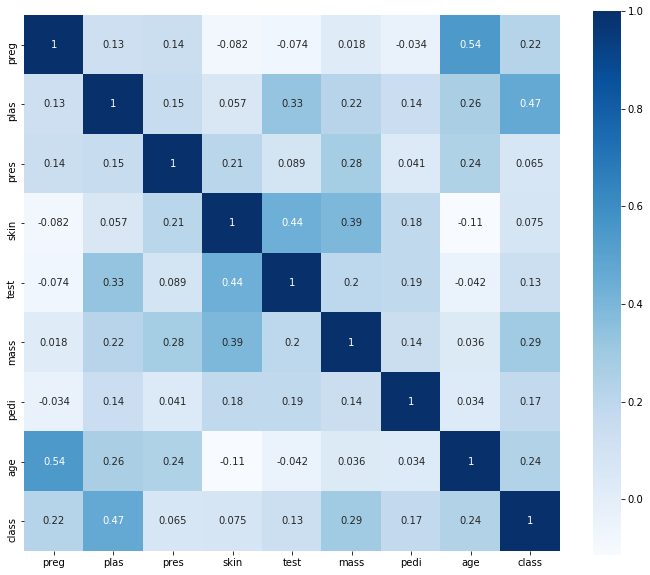

In [31]:
plt.figure(figsize=(12,10)) # Vai ficar quadradinho com a escala no mesmo tamanho.
cor = df_diabetes.corr()
sns.heatmap(cor, annot=True, cmap='Blues',square=True)

# Remoção de características não correlacionadas com a variável de resposta

Para isso usamos a correlação de Pearson para encontrar características que possuem algum grau de correlação com a variável de resposta.

* Deve ser notado, que apesar de uma característica não possuir correlação com a variável de resposta, ela ainda pode interagir com alguma outra variável de forma que tal interação de variáveis ajude a explicar a resposta.
    * Estritamente falando, eliminar variáveis não correlacionadas só faz sentido se as variáveis são independentes de todas as demais variáveis.
    * Outra ressalva é que uma variável pode apresentar baixa correlação com a resposta, porque essa variável foi confundida por outra variável.

* Portanto, a remoção de variáveis com base em correlações univariadas só deve ser realizada, quando for claramente comprovado que adicionar a variável não traz uma melhoria significativa no desempenho do modelo.

## Procedimento
Neste exemplo, podemos calcular as correlações e visualizar como abaixo. 
* Usaremos as bibliotecas matplotib e seaborn para traçar a matriz de correlação como um mapa de calor (heatmap).
* Criamos um filtro para as características com coeficiente de correlação acima de 10%, como fizemos com a variancia.

* Usando o método features.index podemos ver os nomes das características selecionadas.
    * Você poderá usar para criar um DataFrame apenas com a matriz características só para eles.

In [35]:
# Considere correlações apenas com a variável alvo.
cor_target = abs(cor['class'])

# Selecione correlações com um limiar de 10% (0.1)
features = cor_target[cor_target>0.1]
features

preg     0.221898
plas     0.466581
test     0.130548
mass     0.292695
pedi     0.173844
age      0.238356
class    1.000000
Name: class, dtype: float64

In [36]:
features.index

Index(['preg', 'plas', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

## KBest Fit

No Sklearn este método mantêm apenas as características com as maiores pontuações K. (k highest scoring features)
* Neste exemplo usaremos a função ChiSquare (qui-quadrado).

### Procedimento 
* Criamos um objeto da classe SelectKBest com k = 5, 
    * Queremos selecionar as 5 melhores características de pontuação.
    * A função de pontuação é chi2. 
* Em seguida nós ajustamos (fit) o objeto KBest com a variável de resposta X e a matríz de característica Y.

* Podemos pegar todas as pontuações usando o método .scores_ no objeto KBest.
    * De forma similar podemos pegar os valores de p com o método .pvalues_
    * Combinamos tudo num DataFrame chamado df_scores.
* Como estamos interessados apenas nas 5 melhores características, podemos ve-las com o método get_support.

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
KBest = SelectKBest(score_func = chi2, k = 5)
KBest = KBest.fit(X,Y)

### Pontuações e valores de p para todas as características

In [57]:
df_scores = pd.DataFrame({'features': X.columns, 'Chi2Score': KBest.scores_, 'pValue': KBest.pvalues_ })
df_scores

,features,Chi2Score,pValue
0,preg,111.519691,4.552610e-26
1,plas,1411.887041,5.487286e-309
2,pres,17.605373,2.718193e-05
3,skin,53.108040,3.156977e-13
4,test,2175.565273,0.000000e+00
5,mass,127.669343,1.325908e-29
6,pedi,5.392682,2.022137e-02
7,age,181.303689,2.516388e-41


### Características selecionadas

In [58]:
cols = KBest.get_support(indices=True)
cols

array([0, 1, 4, 5, 7])

In [59]:
features = X.columns[cols]
features

Index(['preg', 'plas', 'test', 'mass', 'age'], dtype='object')

No handles with labels found to put in legend.


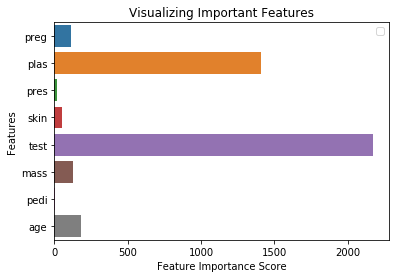

In [60]:
sns.barplot(y=X.columns, x=df_scores['Chi2Score'])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Seleção por percentil

Essa é uma modificação da técnica de seleção de característas K-Best, onde selecionamos o percentil superior das melhores características, baseado em suas pontuações.

Neste exemplo, pegaremos os  digamos que x é 80%, nós queremos selecionar o percentil superior 80 baseado nas suas pontuações.

O cógigo é bem similar ao SelectKBest, apenas mudando o critério de seleção, que nestes caso é o percentil, através do objeto SelectPercentile.
Veremos que entre percentil superior 80 das características com melhor pontuação, terminamos com uma característica adicional "skin", comparado ao método K-Best.

In [61]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [62]:
SPercentile = SelectPercentile(score_func = chi2, percentile=80)
SPercentile = SPercentile.fit(X,Y)

In [63]:
df_scores = pd.DataFrame({'features': X.columns, 'Chi2Score': SPercentile.scores_, 'pValue': SPercentile.pvalues_ })
df_scores

,features,Chi2Score,pValue
0,preg,111.519691,4.552610e-26
1,plas,1411.887041,5.487286e-309
2,pres,17.605373,2.718193e-05
3,skin,53.108040,3.156977e-13
4,test,2175.565273,0.000000e+00
5,mass,127.669343,1.325908e-29
6,pedi,5.392682,2.022137e-02
7,age,181.303689,2.516388e-41


In [64]:
cols = SPercentile.get_support(indices=True)
cols

array([0, 1, 3, 4, 5, 7])

In [65]:
features = X.columns[cols]
features

Index(['preg', 'plas', 'skin', 'test', 'mass', 'age'], dtype='object')

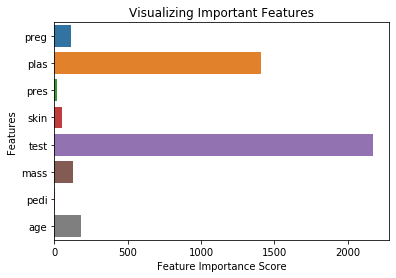

In [76]:
sns.barplot(y=X.columns, x=df_scores['Chi2Score'])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Seleção sequencial de características (StepWise Forward Selector).

In [67]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [68]:
# Estimator
estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1)
# Step Forward Feature Selector
StepForward = sfs(estimator,k_features=6,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)                                   

In [69]:
StepForward.fit(X,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.3s finished

[2020-12-04 12:40:42] Features: 1/6 -- score: 0.7058144469909176[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.4s finished

[2020-12-04 12:40:46] Features: 2/6 -- score: 0.7109073932603345[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.8s finished

[2020-12-04 12:40:50] Features: 3/6 -- score: 0.7370426958662252[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_es

In [71]:
StepForward.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.7012987 , 0.67532468, 0.67532468, 0.7124183 , 0.76470588]),
  'avg_score': 0.7058144469909176,
  'feature_names': ('plas',)},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.68831169, 0.68831169, 0.77922078, 0.70588235, 0.69281046]),
  'avg_score': 0.7109073932603345,
  'feature_names': ('plas', 'mass')},
 3: {'feature_idx': (1, 5, 7),
  'cv_scores': array([0.7012987 , 0.73376623, 0.72727273, 0.78431373, 0.73856209]),
  'avg_score': 0.7370426958662252,
  'feature_names': ('plas', 'mass', 'age')},
 4: {'feature_idx': (1, 5, 6, 7),
  'cv_scores': array([0.75324675, 0.68831169, 0.73376623, 0.79084967, 0.75163399]),
  'avg_score': 0.7435616670910787,
  'feature_names': ('plas', 'mass', 'pedi', 'age')},
 5: {'feature_idx': (0, 1, 5, 6, 7),
  'cv_scores': array([0.77922078, 0.72727273, 0.72077922, 0.80392157, 0.76470588]),
  'avg_score': 0.7591800356506239,
  'feature_names': ('preg', 'plas', 'mass', 'pedi', 'age')},
 6: {'feature_idx': (

In [72]:
# Selected feature columns
cols = list(StepForward.k_feature_idx_)
cols

[0, 1, 4, 5, 6, 7]

In [73]:
features = X.columns[cols]
features

Index(['preg', 'plas', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [74]:
StepForward.k_feature_names_

('preg', 'plas', 'test', 'mass', 'pedi', 'age')

In [75]:
StepForward.k_score_

0.7552414905356082

best combination (ACC: 0.755): (0, 1, 4, 5, 6, 7)

all subsets:
 {1: {'feature_idx': (1,), 'cv_scores': array([0.7012987 , 0.67532468, 0.67532468, 0.7124183 , 0.76470588]), 'avg_score': 0.7058144469909176, 'feature_names': ('plas',)}, 2: {'feature_idx': (1, 5), 'cv_scores': array([0.68831169, 0.68831169, 0.77922078, 0.70588235, 0.69281046]), 'avg_score': 0.7109073932603345, 'feature_names': ('plas', 'mass')}, 3: {'feature_idx': (1, 5, 7), 'cv_scores': array([0.7012987 , 0.73376623, 0.72727273, 0.78431373, 0.73856209]), 'avg_score': 0.7370426958662252, 'feature_names': ('plas', 'mass', 'age')}, 4: {'feature_idx': (1, 5, 6, 7), 'cv_scores': array([0.75324675, 0.68831169, 0.73376623, 0.79084967, 0.75163399]), 'avg_score': 0.7435616670910787, 'feature_names': ('plas', 'mass', 'pedi', 'age')}, 5: {'feature_idx': (0, 1, 5, 6, 7), 'cv_scores': array([0.77922078, 0.72727273, 0.72077922, 0.80392157, 0.76470588]), 'avg_score': 0.7591800356506239, 'feature_names': ('preg', 'plas', 'mass', 'pedi',

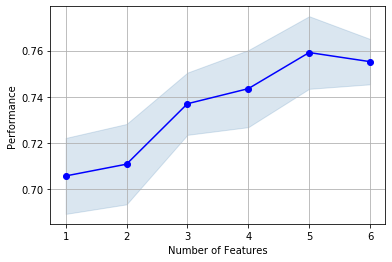

In [110]:
print('best combination (ACC: %.3f): %s\n' % (StepForward.k_score_, StepForward.k_feature_idx_))
print('all subsets:\n', StepForward.subsets_)
plot_sfs(StepForward.get_metric_dict(), kind='std_err');
plt.grid()

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(knn, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

sfs = sfs.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished

[2020-12-04 12:54:15] Features: 1/4 -- score: 0.7174857821916646[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s finished

[2020-12-04 12:54:15] Features: 2/4 -- score: 0.7304643069348952[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s finished

[2020-12-04 12:54:16] Features: 3/4 -- score: 0.7291740938799762[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

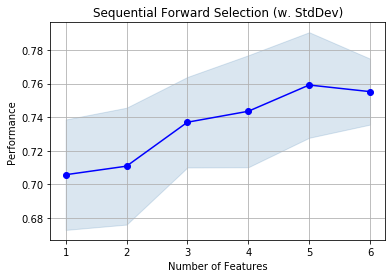

In [89]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#pd.DataFrame.from_dict(StepForward.get_metric_dict(confidence_interval=0.90)).T

fig1 = plot_sfs(StepForward.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## Sequential Feature Selection (StepWise Backward Eliminator)

In [90]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [91]:
# Estimator
estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1)
# Step Forward Feature Selector
StepBackward = sfs(estimator,k_features='best',forward=False,floating=False,verbose=2,scoring='accuracy',cv=5)                                   

In [92]:
StepBackward.fit(X,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.0s finished

[2020-12-04 12:55:37] Features: 7/1 -- score: 0.7500381970970207[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.4s finished

[2020-12-04 12:55:42] Features: 6/1 -- score: 0.7474323062558357[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.7s finished

[2020-12-04 12:55:45] Features: 5/1 -- score: 0.7500297088532383[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_es

In [110]:
StepBackward.subsets_

{8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.72727273, 0.73376623, 0.72727273, 0.77777778, 0.74509804]),
  'avg_score': 0.7422375010610305,
  'feature_names': ('preg',
   'plas',
   'pres',
   'skin',
   'test',
   'mass',
   'pedi',
   'age')},
 7: {'feature_idx': (0, 1, 2, 4, 5, 6, 7),
  'cv_scores': array([0.75974026, 0.72077922, 0.76623377, 0.82352941, 0.7254902 ]),
  'avg_score': 0.7591545709192768,
  'feature_names': ('preg', 'plas', 'pres', 'test', 'mass', 'pedi', 'age')},
 6: {'feature_idx': (1, 2, 4, 5, 6, 7),
  'cv_scores': array([0.74675325, 0.75324675, 0.77922078, 0.81045752, 0.77124183]),
  'avg_score': 0.7721840251252015,
  'feature_names': ('plas', 'pres', 'test', 'mass', 'pedi', 'age')},
 5: {'feature_idx': (1, 2, 4, 5, 7),
  'cv_scores': array([0.75974026, 0.73376623, 0.75324675, 0.85620915, 0.74509804]),
  'avg_score': 0.7696120872591461,
  'feature_names': ('plas', 'pres', 'test', 'mass', 'age')},
 4: {'feature_idx': (1, 2, 5, 7),
  'cv_score

In [93]:
# Selected feature columns
cols = list(StepBackward.k_feature_idx_)
cols

[0, 1, 2, 3, 4, 5, 6, 7]

In [94]:
features = X.columns[cols]
features

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [95]:
StepBackward.k_feature_names_

('preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age')

In [96]:
StepBackward.k_score_

0.7539512774806892

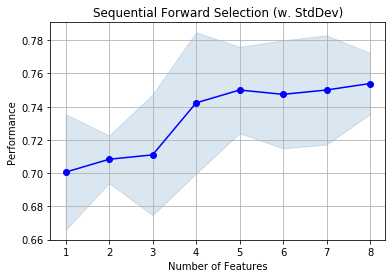

In [97]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#pd.DataFrame.from_dict(StepForward.get_metric_dict(confidence_interval=0.90)).T

fig1 = plot_sfs(StepBackward.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## Recursive Feature Elimination

In [98]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [99]:
estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [100]:
rfe = RFE(estimator=estimator, n_features_to_select=4, step=1)

In [101]:
rfe = rfe.fit(X, Y)

In [102]:
rfe.ranking_

array([4, 1, 2, 5, 3, 1, 1, 1])

In [103]:
cols = rfe.get_support(indices=True)
cols

array([1, 5, 6, 7])

In [104]:
features = X.columns[cols]
features

Index(['plas', 'mass', 'pedi', 'age'], dtype='object')

In [105]:
df_RFE = df_diabetes[features]

In [106]:
df_RFE.head()

,plas,mass,pedi,age
0,148,33.6,0.627,50
1,85,26.6,0.351,31
2,183,23.3,0.672,32
3,89,28.1,0.167,21
4,137,43.1,2.288,33


In [107]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#pd.DataFrame.from_dict(StepForward.get_metric_dict(confidence_interval=0.90)).T

fig1 = plot_sfs(rfe.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

AttributeError: 'RFE' object has no attribute 'get_metric_dict'

## Recursive Feature Elimination with Cross Validation

### With Random Forests

In [40]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [41]:
estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state = 13)

In [42]:
rfecv = RFECV(estimator, cv=5, n_jobs=-1, scoring='accuracy', min_features_to_select = 4)
rfecv = rfecv.fit(X, Y)

In [43]:
rfecv.ranking_

array([2, 1, 1, 3, 4, 1, 1, 1])

In [44]:
rfecv.n_features_

5

In [45]:
rfecv.grid_scores_
# These are for the 5 cross validation grids

array([0.75259316, 0.76956965, 0.75266106, 0.74482642, 0.75132841])

In [46]:
## Best features
cols = rfecv.get_support(indices=True)
cols

array([1, 2, 5, 6, 7], dtype=int32)

In [47]:
features = X.columns[cols]
features

Index(['plas', 'pres', 'mass', 'pedi', 'age'], dtype='object')

In [212]:
df_RFECV = df_diabetes[features]

In [213]:
df_RFECV.head()

,plas,pres,mass,pedi,age
0,148,72,33.6,0.627,50
1,85,66,26.6,0.351,31
2,183,64,23.3,0.672,32
3,89,66,28.1,0.167,21
4,137,40,43.1,2.288,33


### With XGBoost

In [153]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV

In [154]:
estimator = XGBClassifier()

In [155]:
rfecv = RFECV(estimator, cv=5, n_jobs=-1, scoring='accuracy', min_features_to_select = 4)
rfecv = rfecv.fit(X, Y)

In [156]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1])

In [157]:
rfecv.n_features_

8

In [158]:
## Best features
cols = rfecv.get_support(indices=True)

In [159]:
col_names = X.columns[cols]

In [160]:
df_RFECV = df_diabetes[col_names]

In [161]:
df_RFECV.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


##### Probably XGBoost is not the best estimator for RFE or XGBoost here doesn't require feature elimination

## Prinicipal Component Analysis (PCA)

In [214]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [215]:
scaler = MinMaxScaler(feature_range=[0, 1])

In [223]:
X_rescaled = scaler.fit_transform(X)

In [224]:
X_rescaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [225]:
X_rescaled = pd.DataFrame(data = X_rescaled, columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'])

In [226]:
X_rescaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [248]:
pca = PCA()

In [249]:
pca = pca.fit(X_rescaled, Y)

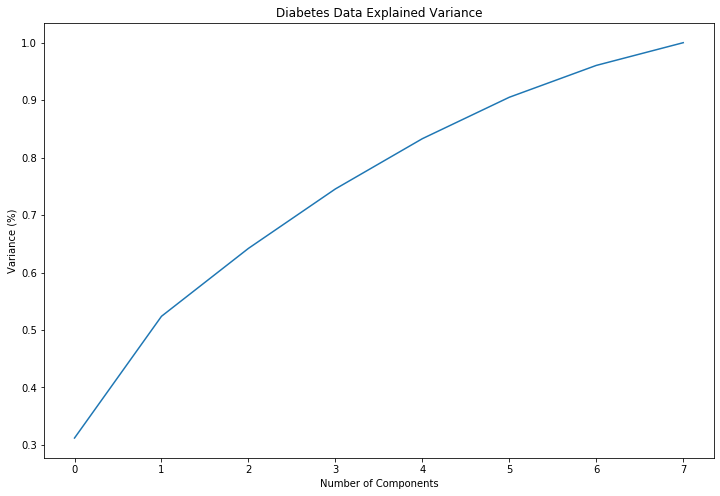

In [250]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Diabetes Data Explained Variance')
plt.show()

### Automatically find optimum number of features through numpy interpolation method

In [266]:
import numpy as np
import math

In [261]:
xp = list(range(len(np.cumsum(pca.explained_variance_ratio_))))
yp = np.cumsum(pca.explained_variance_ratio_)

In [264]:
n_components = np.interp(0.95, yp, xp) + 1

In [267]:
n_components = math.ceil(n_components)

In [268]:
n_components

7

### Automated PCA decomposition

In [234]:
from sklearn.decomposition import PCA

In [235]:
pca = PCA(n_components=7)

In [236]:
pca = pca.fit(X, Y)

In [237]:
pca.components_

array([[-2.02176587e-03,  9.78115765e-02,  1.60930503e-02,
         6.07566861e-02,  9.93110844e-01,  1.40108085e-02,
         5.37167919e-04, -3.56474430e-03],
       [-2.26488861e-02, -9.72210040e-01, -1.41909330e-01,
         5.78614699e-02,  9.46266913e-02, -4.69729766e-02,
        -8.16804621e-04, -1.40168181e-01],
       [-2.24649003e-02,  1.43428710e-01, -9.22467192e-01,
        -3.07013055e-01,  2.09773019e-02, -1.32444542e-01,
        -6.39983017e-04, -1.25454310e-01],
       [-4.90459604e-02,  1.19830016e-01, -2.62742788e-01,
         8.84369380e-01, -6.55503615e-02,  1.92801728e-01,
         2.69908637e-03, -3.01024330e-01],
       [ 1.51612874e-01, -8.79407680e-02, -2.32165009e-01,
         2.59973487e-01, -1.72312241e-04,  2.14744823e-02,
         1.64080684e-03,  9.20504903e-01],
       [-5.04730888e-03,  5.07391813e-02,  7.56365525e-02,
         2.21363068e-01, -6.13326472e-03, -9.70776708e-01,
        -2.02903702e-03, -1.51133239e-02],
       [ 9.86672995e-01,  8.834261

In [238]:
feature_matrix = pca.fit_transform(X)

In [240]:
pd.DataFrame(feature_matrix).head()

,0,1,2,3,4,5,6
0,-75.714655,-35.950783,-7.260789,15.669269,16.506541,3.460442,-0.702047
1,-82.358268,28.908213,-5.496671,9.004554,3.481527,5.590262,-2.572015
2,-74.630643,-67.906496,19.461808,-5.653056,-10.300113,7.144367,4.279067
3,11.077423,34.898486,-0.053018,1.314873,-7.619414,2.583855,-0.809829
4,89.743788,-2.746937,25.212859,18.994237,8.522694,-9.486986,-3.626410


##  Feature Importance of Tree-based classifiers: ExtraTreesClassifier (Note Bagged Decision Trees or other trees could also be used)

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [49]:
estimator = ExtraTreesClassifier(n_estimators=10)
estimator = estimator.fit(X, Y)

In [50]:
estimator.feature_importances_

array([0.11750309, 0.21451933, 0.09232234, 0.06912186, 0.07827504,
       0.14348476, 0.13021632, 0.15455726])

In [51]:
model = SelectFromModel(estimator, prefit=True)

In [52]:
X_new = model.transform(X)

In [53]:
X_new

array([[148.   ,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  26.6  ,   0.351,  31.   ],
       [183.   ,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  26.2  ,   0.245,  30.   ],
       [126.   ,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  30.4  ,   0.315,  23.   ]])

In [54]:
X_new.shape 

(768, 4)

In [55]:
cols = model.get_support(indices = True)
cols

array([1, 5, 6, 7], dtype=int32)

In [56]:
features = X.columns[cols]
features

Index(['plas', 'mass', 'pedi', 'age'], dtype='object')